In [1]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('../data/bangalore_rent_data_model_ready.csv')

df.head()


,Title,Location,Rent,Bathrooms,BHK,Area
0,"3 BHK Flat for Rent in L&T Raintree Boulevard,...","L&T Raintree Boulevard, Hebbal",69000,3.0,3.0,986
1,"4 BHK Flat for Rent in Brigade Gateway, Rajaji...","Brigade Gateway, Rajajinagar",100000,4.0,4.0,2000
2,"2 BHK Flat for Rent in Sparkle Marquise, Banne...","Sparkle Marquise, Bannerghatta Main Road",55000,2.0,2.0,834
3,"2 BHK Flat for Rent in Godrej Woodsman Estate,...","Godrej Woodsman Estate, Hebbal",59000,2.0,2.0,1302
4,4 BHK Flat for Rent in Prestige Estates Shanti...,"Prestige Estates Shantiniketan, Whitefield",130000,5.0,4.0,3122


In [2]:
df['Rent_per_BHK'] = df['Rent'] / df['BHK']


In [3]:
df['Area_per_BHK'] = df['Area'] / df['BHK']


In [4]:
df['Rent_per_sqft'] = df['Rent'] / df['Area']

# Preview all engineered features
df[['Rent', 'BHK', 'Area', 'Rent_per_BHK', 'Area_per_BHK', 'Rent_per_sqft']].head()


,Rent,BHK,Area,Rent_per_BHK,Area_per_BHK,Rent_per_sqft
0,69000,3.0,986,23000.0,328.666667,69.979716
1,100000,4.0,2000,25000.0,500.000000,50.000000
2,55000,2.0,834,27500.0,417.000000,65.947242
3,59000,2.0,1302,29500.0,651.000000,45.314900
4,130000,4.0,3122,32500.0,780.500000,41.639974


In [8]:
# Step 3: Select Features & Target
X = df.drop(['Rent', 'Title'], axis=1)
y = df['Rent']


In [9]:
X = pd.get_dummies(X, columns=['Location'], drop_first=True)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    results.append({
        'Model': name,
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'R² Score': round(r2, 4)
    })

# Create a DataFrame for comparison
results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False)
print("Model Comparison:\n")
print(results_df)


Model Comparison:

               Model       MAE      RMSE  R² Score
3  Gradient Boosting   1365.95   2588.36    0.9958
2      Random Forest    562.88   2968.44    0.9945
0  Linear Regression   5223.10  11782.37    0.9139
1                SVR  28848.36  41086.73   -0.0469


C:\Users\kanika\AppData\Local\Temp\ipykernel_11004\3082087550.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')


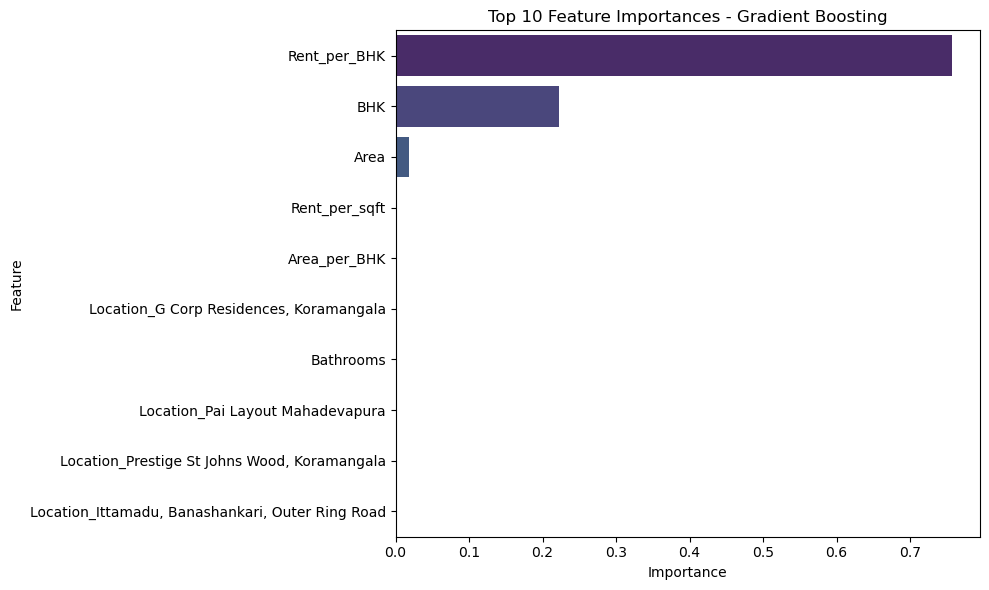

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances
best_model = models['Gradient Boosting']
feature_importances = best_model.feature_importances_

# Create DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importances - Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


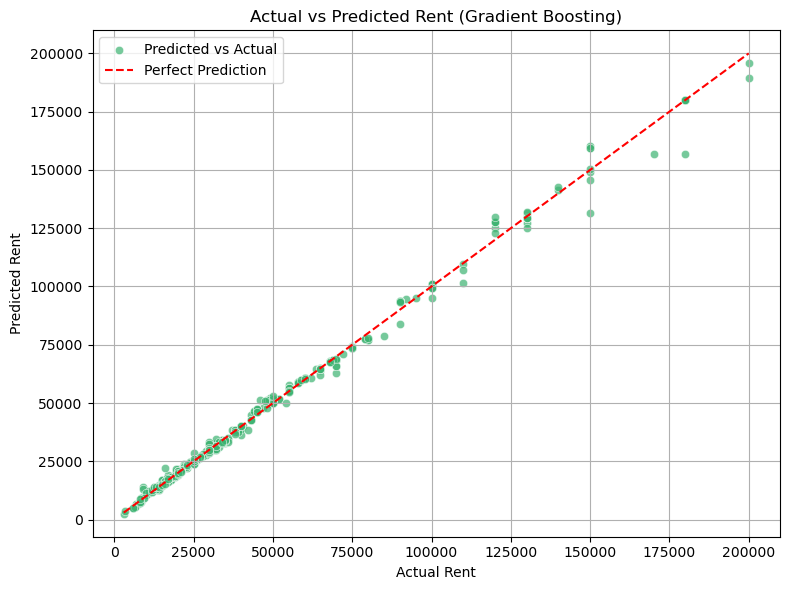

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict using the best model
y_pred = models['Gradient Boosting'].predict(X_test)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plotting
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(data=comparison_df, x='Actual', y='Predicted',
                          color='mediumseagreen', alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', label='Perfect Prediction')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Actual vs Predicted Rent (Gradient Boosting)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
import joblib

# Save the best model (Gradient Boosting)
best_model = models['Gradient Boosting']
joblib.dump(best_model, 'gradient_boosting_model.pkl')

print("Model saved successfully as 'gradient_boosting_model.pkl'")


Model saved successfully as 'gradient_boosting_model.pkl'


In [20]:
# Save the feature column names
joblib.dump(X_train.columns.tolist(), 'feature_columns.pkl')
print("Feature columns saved successfully as 'feature_columns.pkl'")



Feature columns saved successfully as 'feature_columns.pkl'


In [21]:
df.head(10).to_csv('sample_input_data.csv', index=False)
print("Sample input data saved as 'sample_input_data.csv'")


Sample input data saved as 'sample_input_data.csv'


In [22]:
import os
import shutil

os.makedirs('models', exist_ok=True)
shutil.move('gradient_boosting_model.pkl', 'models/gradient_boosting_model.pkl')
shutil.move('feature_columns.pkl', 'models/feature_columns.pkl')
shutil.move('sample_input_data.csv', 'models/sample_input_data.csv')


'models/sample_input_data.csv'

In [23]:
import os

print("Files in models/:")
print(os.listdir("models"))


Files in models/:
['feature_columns.pkl', 'gradient_boosting_model.pkl', 'sample_input_data.csv']
